In [23]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt  


In [11]:
df = pd.read_csv('Hitters.csv')
df = df.dropna()
df

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A


In [21]:
X = df[['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors']].values
y = df['Salary'].values

#### 1.1 
Use LASSO regression to predict Salary from the other numeric predictors. Create a visualization of the coefficient trajectories. Comment on which are the final three predictors that remain in the model. Use cross-validation to find the optimal value of the regularization penality. How many predictors are left in that model?

In [41]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html

alphas = [1e-10, 1e-4, 1e-2, 1, 5, 10, 20, 50, 100]
accuracies = [] 
coef = []
highest = 0
lowest_MSE = float('inf')
best_coef = 0

# Tune parameter
for a in alphas:  
    kf = KFold(n_splits=5)
    for train_index, test_index in kf.split(X):
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        lasso_reg = Lasso(alpha = a, max_iter=50000)
        lasso_reg.fit(X_train,y_train)
        #coef.append(lasso_reg.coef_)
        y_pred = lasso_reg.predict(X_test)
        MSE = mean_squared_error(y_test, y_pred)
        if MSE < lowest_MSE:
            best_coef = c
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
    lasso_reg = Lasso(alpha = a, max_iter=50000)
    lasso_reg.fit(train_X, train_y)
    coef.append(lasso_reg.coef_)
print(best_coef)
print(coef)

/Users/audrey/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 441557.8608218692, tolerance: 3606.2122661976773
  positive)


100
[array([-1.90329475,  6.83003178,  4.48862716, -1.46859964, -0.41262891,
        5.53565628, -4.39676929, -0.18067333,  0.01732023, -1.36101932,
        1.22717611,  1.40636529, -0.49497356,  0.31193662,  0.43056809,
       -5.34764378]), array([-2.1581212 ,  5.94395048,  0.27275856,  0.64498353,  0.21018774,
        4.91560443, -1.66300411, -0.18406081,  0.27923875,  0.51404256,
        1.26060088,  0.59744045, -0.64378315,  0.33471821,  0.5096275 ,
       -1.59847138]), array([-2.50495622,  9.47697523,  6.83627475, -5.3777383 , -0.89302445,
        8.16579545,  0.01784951, -0.20851535, -0.36539212, -1.55007883,
        2.62592343,  1.3652661 , -1.19838962,  0.26172828,  0.39487049,
       -0.59144456]), array([-1.617896  ,  6.34183396,  0.37960273, -2.3443106 ,  0.70468617,
        5.65518518, -4.32122939, -0.06099566, -0.51232594, -1.69582321,
        1.83177701,  1.19038031, -0.73889935,  0.25109926,  0.21058416,
       -3.9562646 ]), array([-2.5563493 ,  9.51703683,  3.0366900

In [50]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
lasso_reg = Lasso(alpha = 100, max_iter=50000)
lasso_reg.fit(train_X, train_y)
lasso_reg.coef_

array([-1.86724289,  6.85536067, -0.        , -0.23551195,  0.14878681,
        5.47816313, -0.        , -0.10260497,  0.03409402, -0.        ,
        1.2090107 ,  0.6097069 , -0.71070667,  0.38927437,  0.23827311,
       -0.        ])

(398.1071705534973, 2.5118864315095823e-11)

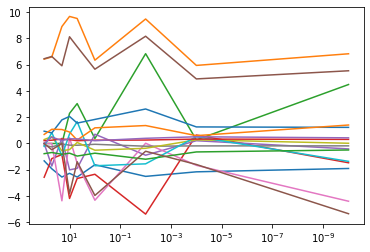

In [42]:
ax = plt.gca()

ax.plot(alphas, coef)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])

The final predictors that remain in the model are AtBat, Hits, and Walks.

#### 1.2
Repeat with Ridge Regression. Visualize coeffecient trajectories. Use cross- validation to find the optimal vaule of the regularization penalty.


In [46]:
alphas = [1e-10, 1e-4, 1e-2, 1, 5, 10, 20, 50, 100]
accuracies = [] 
highest = 0
lowest_MSE = float('inf')
best_coef = 0
coef = []

# Tune parameter
for a in alphas:  
    kf = KFold(n_splits=5)
    for train_index, test_index in kf.split(X):
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        ridge_reg = Ridge(alpha = a, max_iter=50000)
        ridge_reg.fit(X_train,y_train)
        y_pred = ridge_reg.predict(X_test)
        MSE = mean_squared_error(y_test, y_pred)
        if MSE < lowest_MSE:
            best_coef = c
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
    ridge_reg = Ridge(alpha = a, max_iter=50000)
    ridge_reg.fit(train_X, train_y)
    coef.append(ridge_reg.coef_)
print(best_coef)
    

100


In [52]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
ridge_reg = Ridge(alpha = 100, max_iter=50000)
ridge_reg.fit(train_X, train_y)
ridge_reg.coef_

array([-2.63367451,  9.30476972, -6.87638415, -1.69169245,  1.12832968,
        6.25488978, -9.69156418, -0.09288991,  0.11389462,  2.53021922,
        1.01604238,  0.27195211, -0.78905604,  0.27816181,  0.30627532,
       -1.80748116])

(398.1071705534973, 2.5118864315095823e-11)

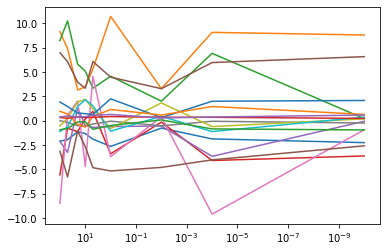

In [47]:
ax = plt.gca()

ax.plot(alphas, coef)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])

#### 2
Explain in your own words the bias-variance tradeoff. What role does regularization play in this tradeoff? Make reference to your findings in number (1) to describe models of high/low bias and variance.

Trade-off is tension between the error introduced by the bias and the variance. When the model is underfitting, there will be high bias, which means the error is big and the model doesn’t have the ability to capture enough information of the dataset. So in the meantime, the variance will be low. Low variance means that given different data points, the results do not have a high variation. On the other hand, when the model is overfitting, bias is low, but even a small change in data will result in a big change of target function which leads to a high variance.
Regularization is a penalty term of the loss function that constrains or shrinks the coefficient estimates towards zero. In other words, this technique discourages from learning a more complex or flexible model, so as to avoid the risk of overfitting. Refer to probelem one, given a set of regularization coefficient, the models perform the best when the coefficient is large, meaning the models are penalized for being too complex, and they have high bias and low variance. 
